In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

## Standard

In [2]:
PATH_ROOT =     Path.cwd()
PATH_OUTPUT =   PATH_ROOT / "output"
PATH_DATA =     PATH_ROOT / "data"
PATH_NTBK =     PATH_ROOT / "notebook"

FILE_TRACKS_CSV = PATH_DATA / "tracks.csv"
FILE_ARTIST_CSV = PATH_DATA / "artists.csv"

In [4]:
df_tracks = pd.read_csv(FILE_TRACKS_CSV)
df_artists = pd.read_csv(FILE_ARTIST_CSV)

In [5]:
df_tracks.to_parquet("sample.parquet")

PosixPath('/Users/mavwong/Desktop/Github/SpotifyDataAnalysis/data')

In [5]:
def convert_to_parquet(input_path:Path) -> None:
    """ Convert CSV file to Parquet. """
    if not isinstance(input_path, Path):
        input_path = Path(input_path)
    
    df = pd.read_csv(input_path)
    
    output = input_path.parent / f"{input_path.stem}.parquet"
    df.to_parquet(output, engine="pyarrow")

In [8]:
convert_to_parquet(FILE_ARTIST_CSV)

In [7]:
check = pd.read_parquet("sample.parquet", engine='pyarrow')
check

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


## Exploring Data and Processing Data

In [4]:
df_track=pd.read_csv(FILE_TRACKS_CSV)
df_track.head()

# Sort the data by its popularity
df_track_popularity = df_track.sort_values("popularity", ascending=False).reset_index(drop=True)

In [5]:
df_track["release_date"].astype("datetime64")

0        1922-02-22
1        1922-06-01
2        1922-03-21
3        1922-03-21
4        1922-01-01
            ...    
586667   2020-09-26
586668   2020-10-21
586669   2020-09-02
586670   2021-03-05
586671   2015-07-01
Name: release_date, Length: 586672, dtype: datetime64[ns]

In [6]:
df_track.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [7]:
rows, cols = df_track.shape
print(f"Number Rows: \t{rows}")
print(f"Number Cols: \t{cols}")

Number Rows: 	586672
Number Cols: 	20


In [8]:
# Get the columns
df_track.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [9]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [10]:
#check null values
df_track.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [11]:
sort_df=df_track.sort_values("popularity",ascending=True)
sort_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4


In [12]:
df_track.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [13]:
most_popular=df_track[df_track["popularity"]>90].sort_values(by="popularity",ascending=False)
most_popular.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4


In [14]:
df_track[["artists"]].iloc[18]

artists    ['Victor Boucher']
Name: 18, dtype: object

In [15]:
df_track["duration"]=df_track["duration_ms"].apply(lambda x:round(x/1000))
df_track.drop("duration_ms",inplace=True,axis=1)

In [16]:
sample_df=df_track.sample(int(0.004*len(df_track)))
sample_df.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
389668,1Lt82WcaNF72QM41Rp4QHw,Самая тёмная ночь,43,0,['снова не успел'],['1P5Zt9ZKN1YSlV5TqJPLpF'],2018,0.522,0.800,0,-5.865,1,0.0451,0.3340,0.000070,0.1680,0.612,79.983,4,148
440968,31QdL5SLWkDZlfxNwNfAwY,Washington Down,14,0,['The 4 Of Us'],['1Yr9lXq2m3KO4otqQKcllY'],1989-09-05,0.647,0.202,2,-16.831,1,0.0361,0.7090,0.000001,0.1300,0.151,109.465,4,179
386226,4Y4QsowI5GPRhQR1OwtfXb,Когда нет денег,33,1,['Leningrad'],['2a3EJeQjcAelthFGr5bzQC'],2000-11-13,0.650,0.670,7,-5.030,1,0.0291,0.0828,0.000000,0.1450,0.916,126.698,4,179
32413,1SjEwGW0MKZX3DiAlBC9qv,Gimme A Pigfoot And A Bottle Of Beer,18,0,"['Billie Holiday', 'Sy Oliver & His Orchestra']","['1YzCsTRb22dQkh9lghPIrp', '0Y0kqoEdmURT48Od9D...",1958-01-01,0.658,0.196,7,-11.504,1,0.0620,0.8110,0.000000,0.2770,0.647,98.227,4,166
457609,2N7JVzYGU2YRbFplrxshGm,"Signe de vie, signe d'amour",16,0,['Alain Chamfort'],['79SJOUvbcH85tS57TH1f4H'],1973-01-01,0.586,0.671,3,-11.550,1,0.0381,0.7270,0.000033,0.0682,0.962,139.955,4,169


In [17]:
#who has most monthly listeners?
df_track["artists"].value_counts()

['Die drei ???']                   3856
['TKKG Retro-Archiv']              2006
['Benjamin Blümchen']              1503
['Bibi Blocksberg']                1472
['Lata Mangeshkar']                1373
                                   ... 
['IU', 'Jang Yi-jeong']               1
['黃宗澤']                               1
['Vincy Chan', '海鳴威']                 1
['Dough-Boy']                         1
['Gentle Bones', 'Clara Benin']       1
Name: artists, Length: 114030, dtype: int64

In [18]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   explicit          586672 non-null  int64  
 4   artists           586672 non-null  object 
 5   id_artists        586672 non-null  object 
 6   release_date      586672 non-null  object 
 7   danceability      586672 non-null  float64
 8   energy            586672 non-null  float64
 9   key               586672 non-null  int64  
 10  loudness          586672 non-null  float64
 11  mode              586672 non-null  int64  
 12  speechiness       586672 non-null  float64
 13  acousticness      586672 non-null  float64
 14  instrumentalness  586672 non-null  float64
 15  liveness          586672 non-null  float64
 16  valence           58

In [19]:
df_track[df_track["duration"]==5621]["artists"]

326329    ['ท่านพุทธทาส']
Name: artists, dtype: object

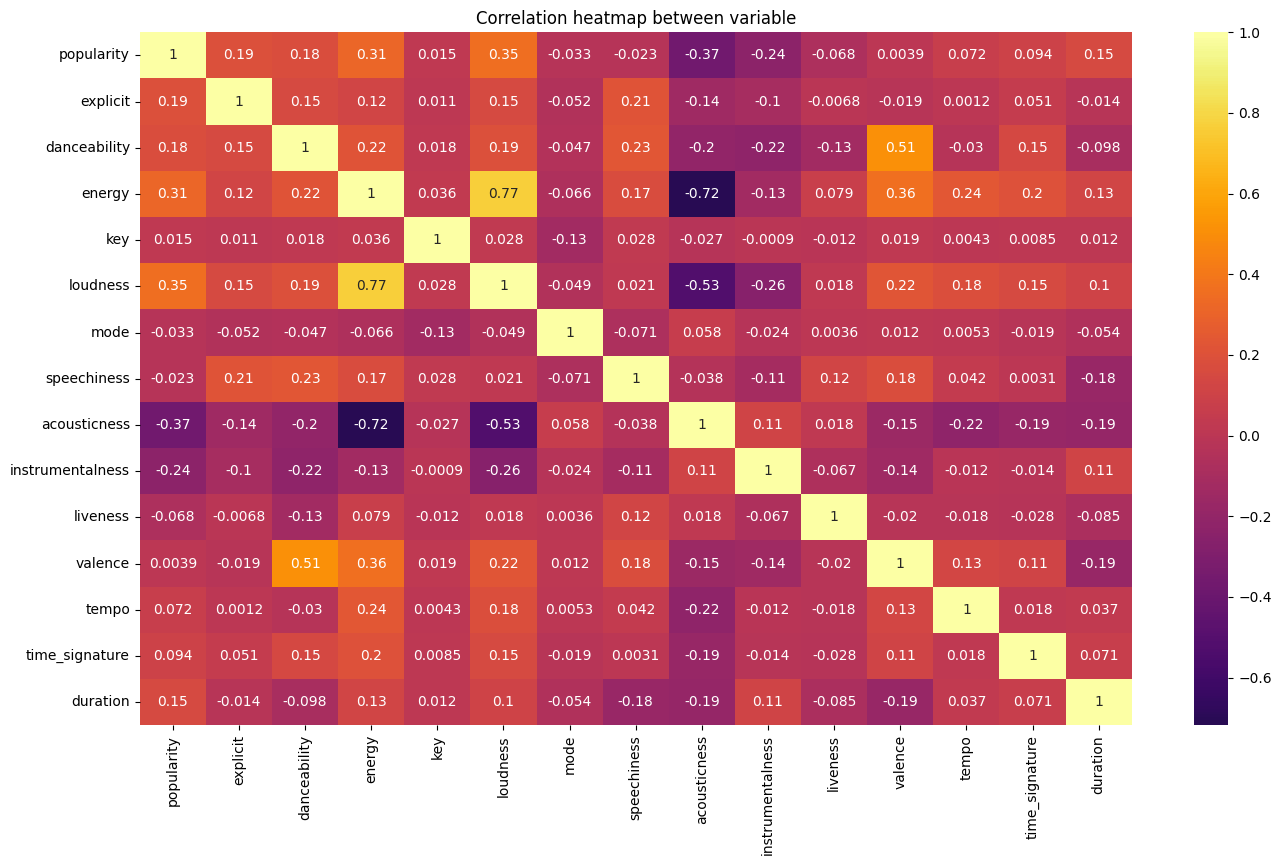

In [47]:
df_corr_spearman = df_track.corr(method="spearman")

plt.figure(figsize=(16,9))
fig = sns.heatmap(
    df_corr_spearman, annot=True, cmap="inferno", center=0
)
fig.set(title="Correlation heatmap between variable")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


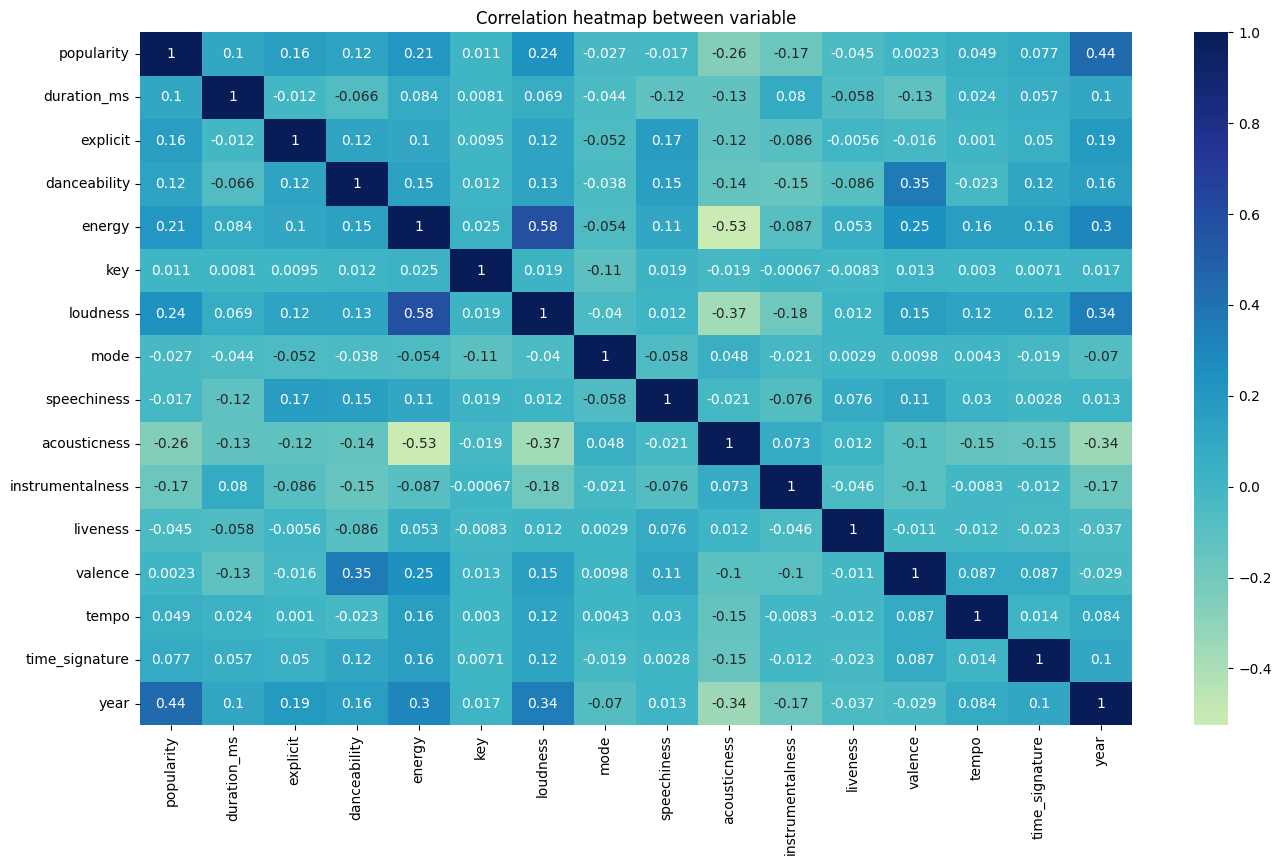

In [100]:
df_corr_kendall = df_track.corr(method="kendall")

plt.figure(figsize=(16,9))
fig = sns.heatmap(
    df_corr_kendall, annot=True, cmap="YlGnBu", center=0
)
fig.set(title="Correlation heatmap between variable")

plt.show()

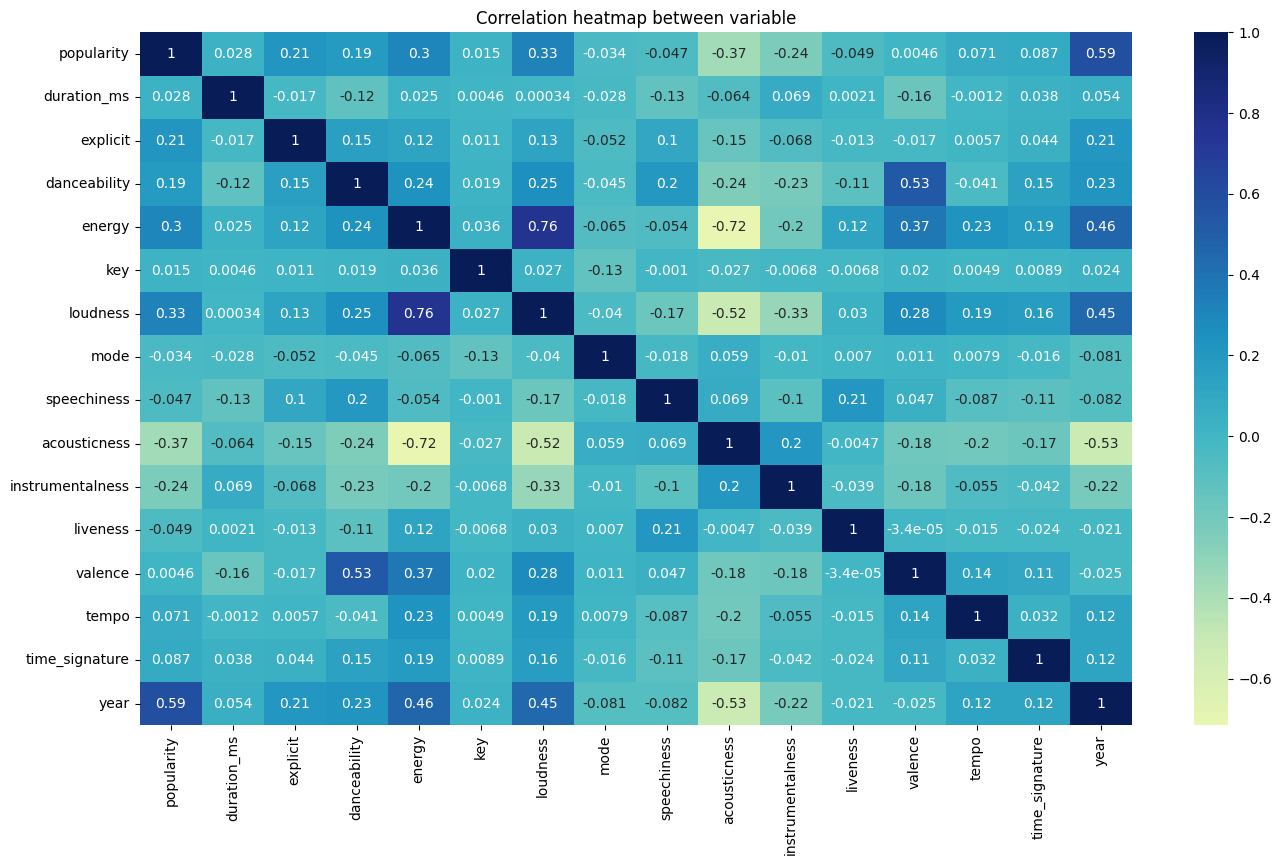

In [98]:
df_corr_pearson = df_track.corr(method="pearson")

plt.figure(figsize=(16,9))
fig = sns.heatmap(
    df_corr_pearson, annot=True, cmap="YlGnBu", center=0
)
fig.set(title="Correlation heatmap between variable")

plt.show()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
353944,5SAIs7VvtE7GedxG1dHrgq,И ако някой ден,2,184816,0,['Емил Димитров'],['2fyX3KN0QchIB4mRmwKbzn'],1970-10-10,0.636,0.612,7,-7.231,1,0.0434,0.5570,0.000387,0.1270,0.746,122.356,4
35247,3VLQheoFvC6Bu5ZFqTmJru,Work Song,19,451267,0,"['Milt Jackson', 'Oscar Peterson']","['23i8EixXKG0EWGRCfHlUGN', '6zkX5fhrSD4tdVOmim...",1961-10-07,0.513,0.327,2,-16.421,0,0.0342,0.7690,0.000233,0.0888,0.680,92.247,4
239809,4dCyvyiImlpONBZlGn8JyW,Misty Roses,32,155933,0,['Astrud Gilberto'],['5rX2c1zow6hCph8PnnU3kF'],1966-01-01,0.533,0.314,1,-15.766,1,0.0310,0.6760,0.011500,0.1570,0.529,116.208,4
169441,7GTJgrYsK7ecPiwyEam2XY,2000 Light Years Away,34,144627,0,['Green Day'],['7oPftvlwr6VrsViSDV7fJY'],1992-01-17,0.206,0.991,10,-3.557,1,0.1290,0.0017,0.000111,0.3380,0.652,186.581,4
285296,35gYeBK9dLPDv4IKt0qirq,Se Não Chovesse (Fado Súplica),37,206853,0,['Cristina Branco'],['0Naz1mk7F25xrk44Ugd8nd'],2011-01-01,0.659,0.267,11,-9.922,0,0.0404,0.8270,0.000698,0.1840,0.485,82.204,4


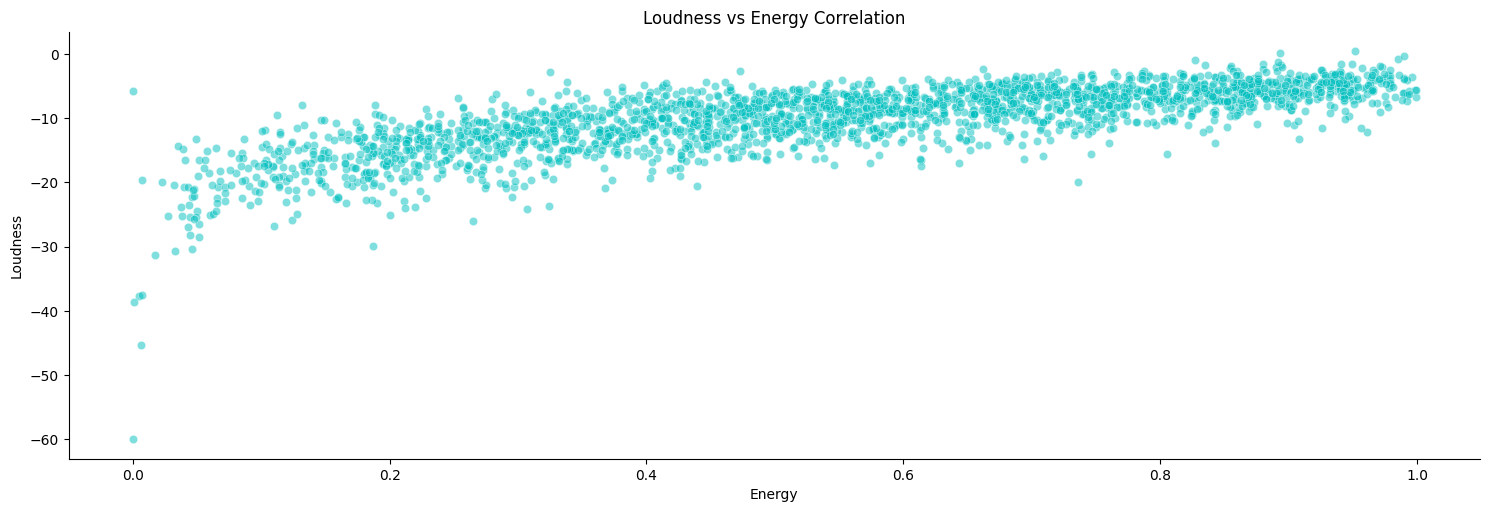

In [41]:
fig = sns.relplot(x="energy", y="loudness", data=sample_df, kind="scatter", aspect=3, alpha=0.5, color="c")
fig.set(title="Loudness vs Energy Correlation", xlabel="Energy", ylabel="Loudness")

plt.show()

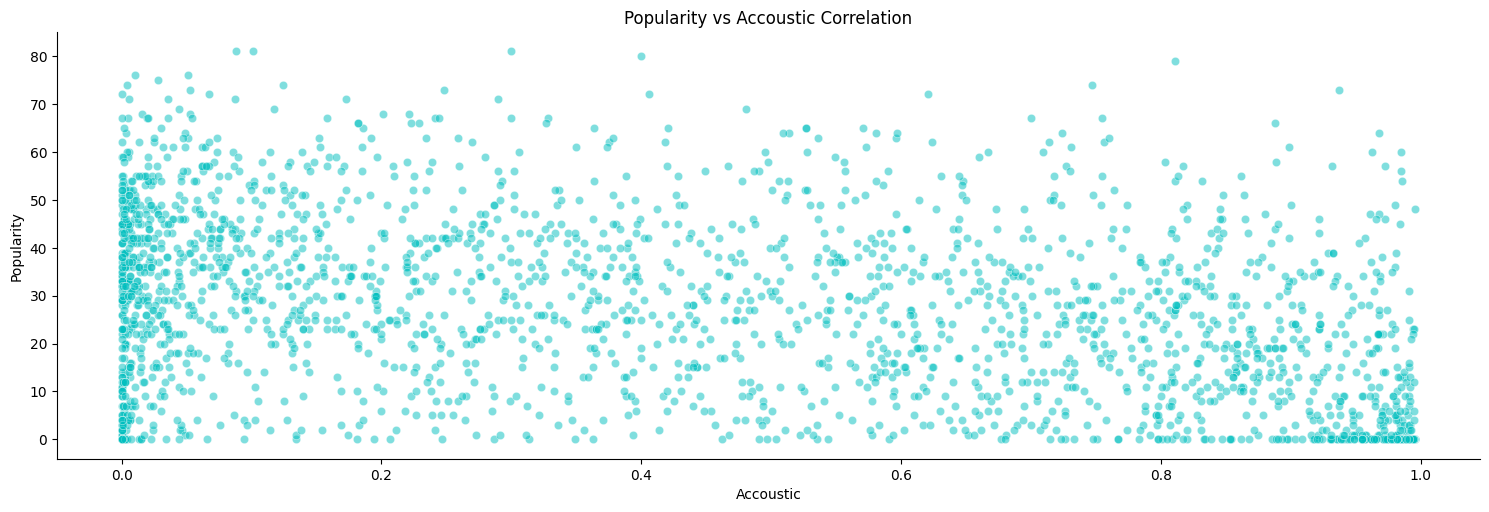

In [42]:
fig = sns.relplot(x="acousticness", y="popularity", data=sample_df, kind="scatter", aspect=3, alpha=0.5, color="c")
fig.set(title="Popularity vs Accoustic Correlation", xlabel="Accoustic", ylabel="Popularity")
plt.show()

In [96]:
plt.figure(figsize=(16,9), dpi=720)

fig = sns.regplot(data=sample_df,y="popularity",x="acousticness", color="c")
fig.set(title="Popularity vs Accoustic Correlation", xlabel="Accoustic", ylabel="Popularity")

plt.savefig('sample.png')
plt.show()

In [20]:
df_track["dates"]=pd.to_datetime(df_track["release_date"])
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   explicit          586672 non-null  int64         
 4   artists           586672 non-null  object        
 5   id_artists        586672 non-null  object        
 6   release_date      586672 non-null  object        
 7   danceability      586672 non-null  float64       
 8   energy            586672 non-null  float64       
 9   key               586672 non-null  int64         
 10  loudness          586672 non-null  float64       
 11  mode              586672 non-null  int64         
 12  speechiness       586672 non-null  float64       
 13  acousticness      586672 non-null  float64       
 14  inst

In [39]:
df_track["release_date"]=pd.to_datetime(df_track["release_date"])
df_track["year"]=df_track["release_date"].dt.year

In [22]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   explicit          586672 non-null  int64         
 4   artists           586672 non-null  object        
 5   id_artists        586672 non-null  object        
 6   release_date      586672 non-null  datetime64[ns]
 7   danceability      586672 non-null  float64       
 8   energy            586672 non-null  float64       
 9   key               586672 non-null  int64         
 10  loudness          586672 non-null  float64       
 11  mode              586672 non-null  int64         
 12  speechiness       586672 non-null  float64       
 13  acousticness      586672 non-null  float64       
 14  inst

<Figure size 11520x6480 with 0 Axes>

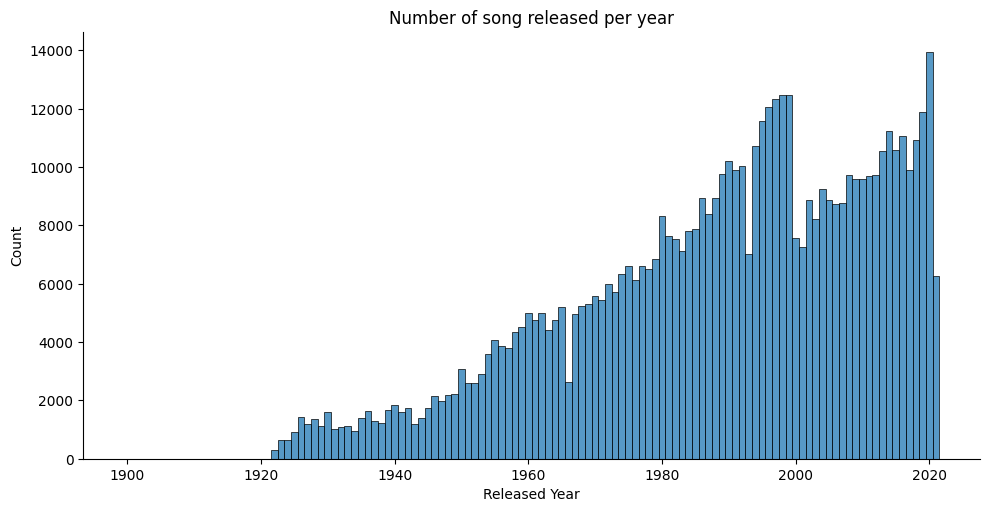

In [111]:
plt.figure(figsize=(16,9), dpi=720)

fig = sns.displot(df_track["year"],discrete=True,aspect=2,height=5,kind="hist")
fig.set(title="Number of song released per year", xlabel="Released Year", ylabel="Count")

plt.show()

In [114]:
plt.figure(figsize=(16,9))

fig = sns.regplot(data=df_track,y="year",x="acousticness",color="c")
fig.set(title="Popularity vs Accoustic Correlation", xlabel="Accoustic", ylabel="Popularity")

plt.show()

In [105]:
total_dr=df_track["duration"]
fig,ax=plt.subplots()
fig=sns.barplot(x=df_track["year"],y=total_dr,ax=ax,errwidth=False).set(title="Year vs Duration")

KeyError: 'duration'

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

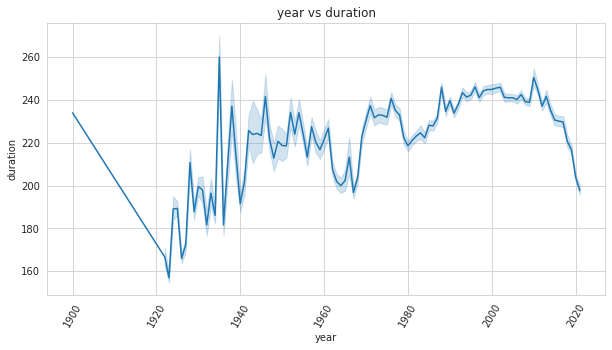

In [25]:
sns.set_style(style="whitegrid")
fig_dims=(10,5)
fig,ax=plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=df_track["year"],y=total_dr,ax=ax).set(title="year vs duration")
plt.xticks(rotation=60)

In [26]:
df=pd.read_csv("../input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


NameError: name 'df' is not defined

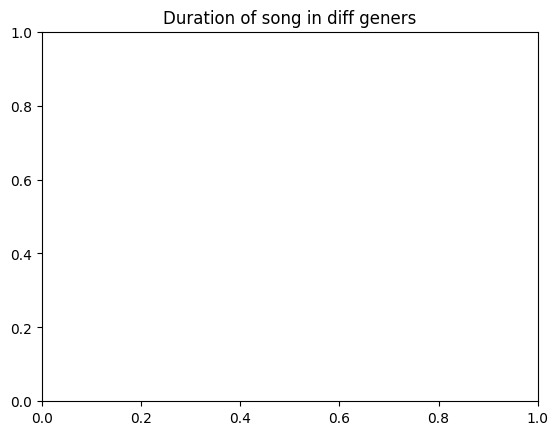

In [62]:
plt.title("Duration of song in diff geners")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y=df["genre"],x=df["duration_ms"],data=df)
plt.xlabel("Duration in milli second")
plt.ylabel("Geners")

[Text(0.5, 1.0, 'top 10 genres by popularity')]

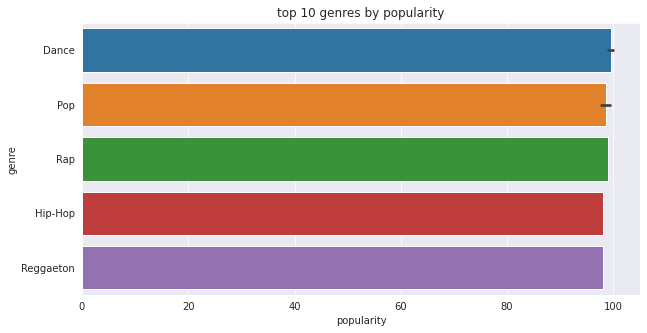

In [28]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous=df.sort_values("popularity",ascending=False).head(10)
sns.barplot(y="genre",x="popularity",data=famous).set(title="top 10 genres by popularity")